In [103]:
# Bibliotecas
# Manipulação de dados
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Setando
plt.style.use('ggplot')

In [65]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [66]:
# Verificando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [67]:
# Estatisticas descritivas
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


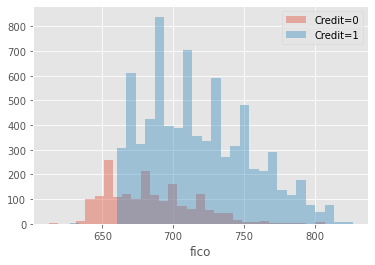

In [68]:
# Observando coluna 'fico' para cada tipo de credit.policy

sns.distplot(df[df['credit.policy']==0]['fico'], bins=30, label='Credit=0', kde=False)
sns.distplot(df[df['credit.policy']==1]['fico'], bins=30, label='Credit=1', kde=False)
plt.legend()

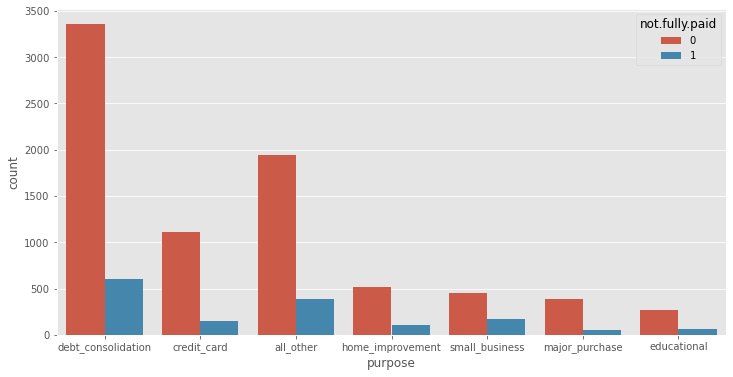

In [69]:
# Observando coluna purpose por 'not.fully.paid' 
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df)

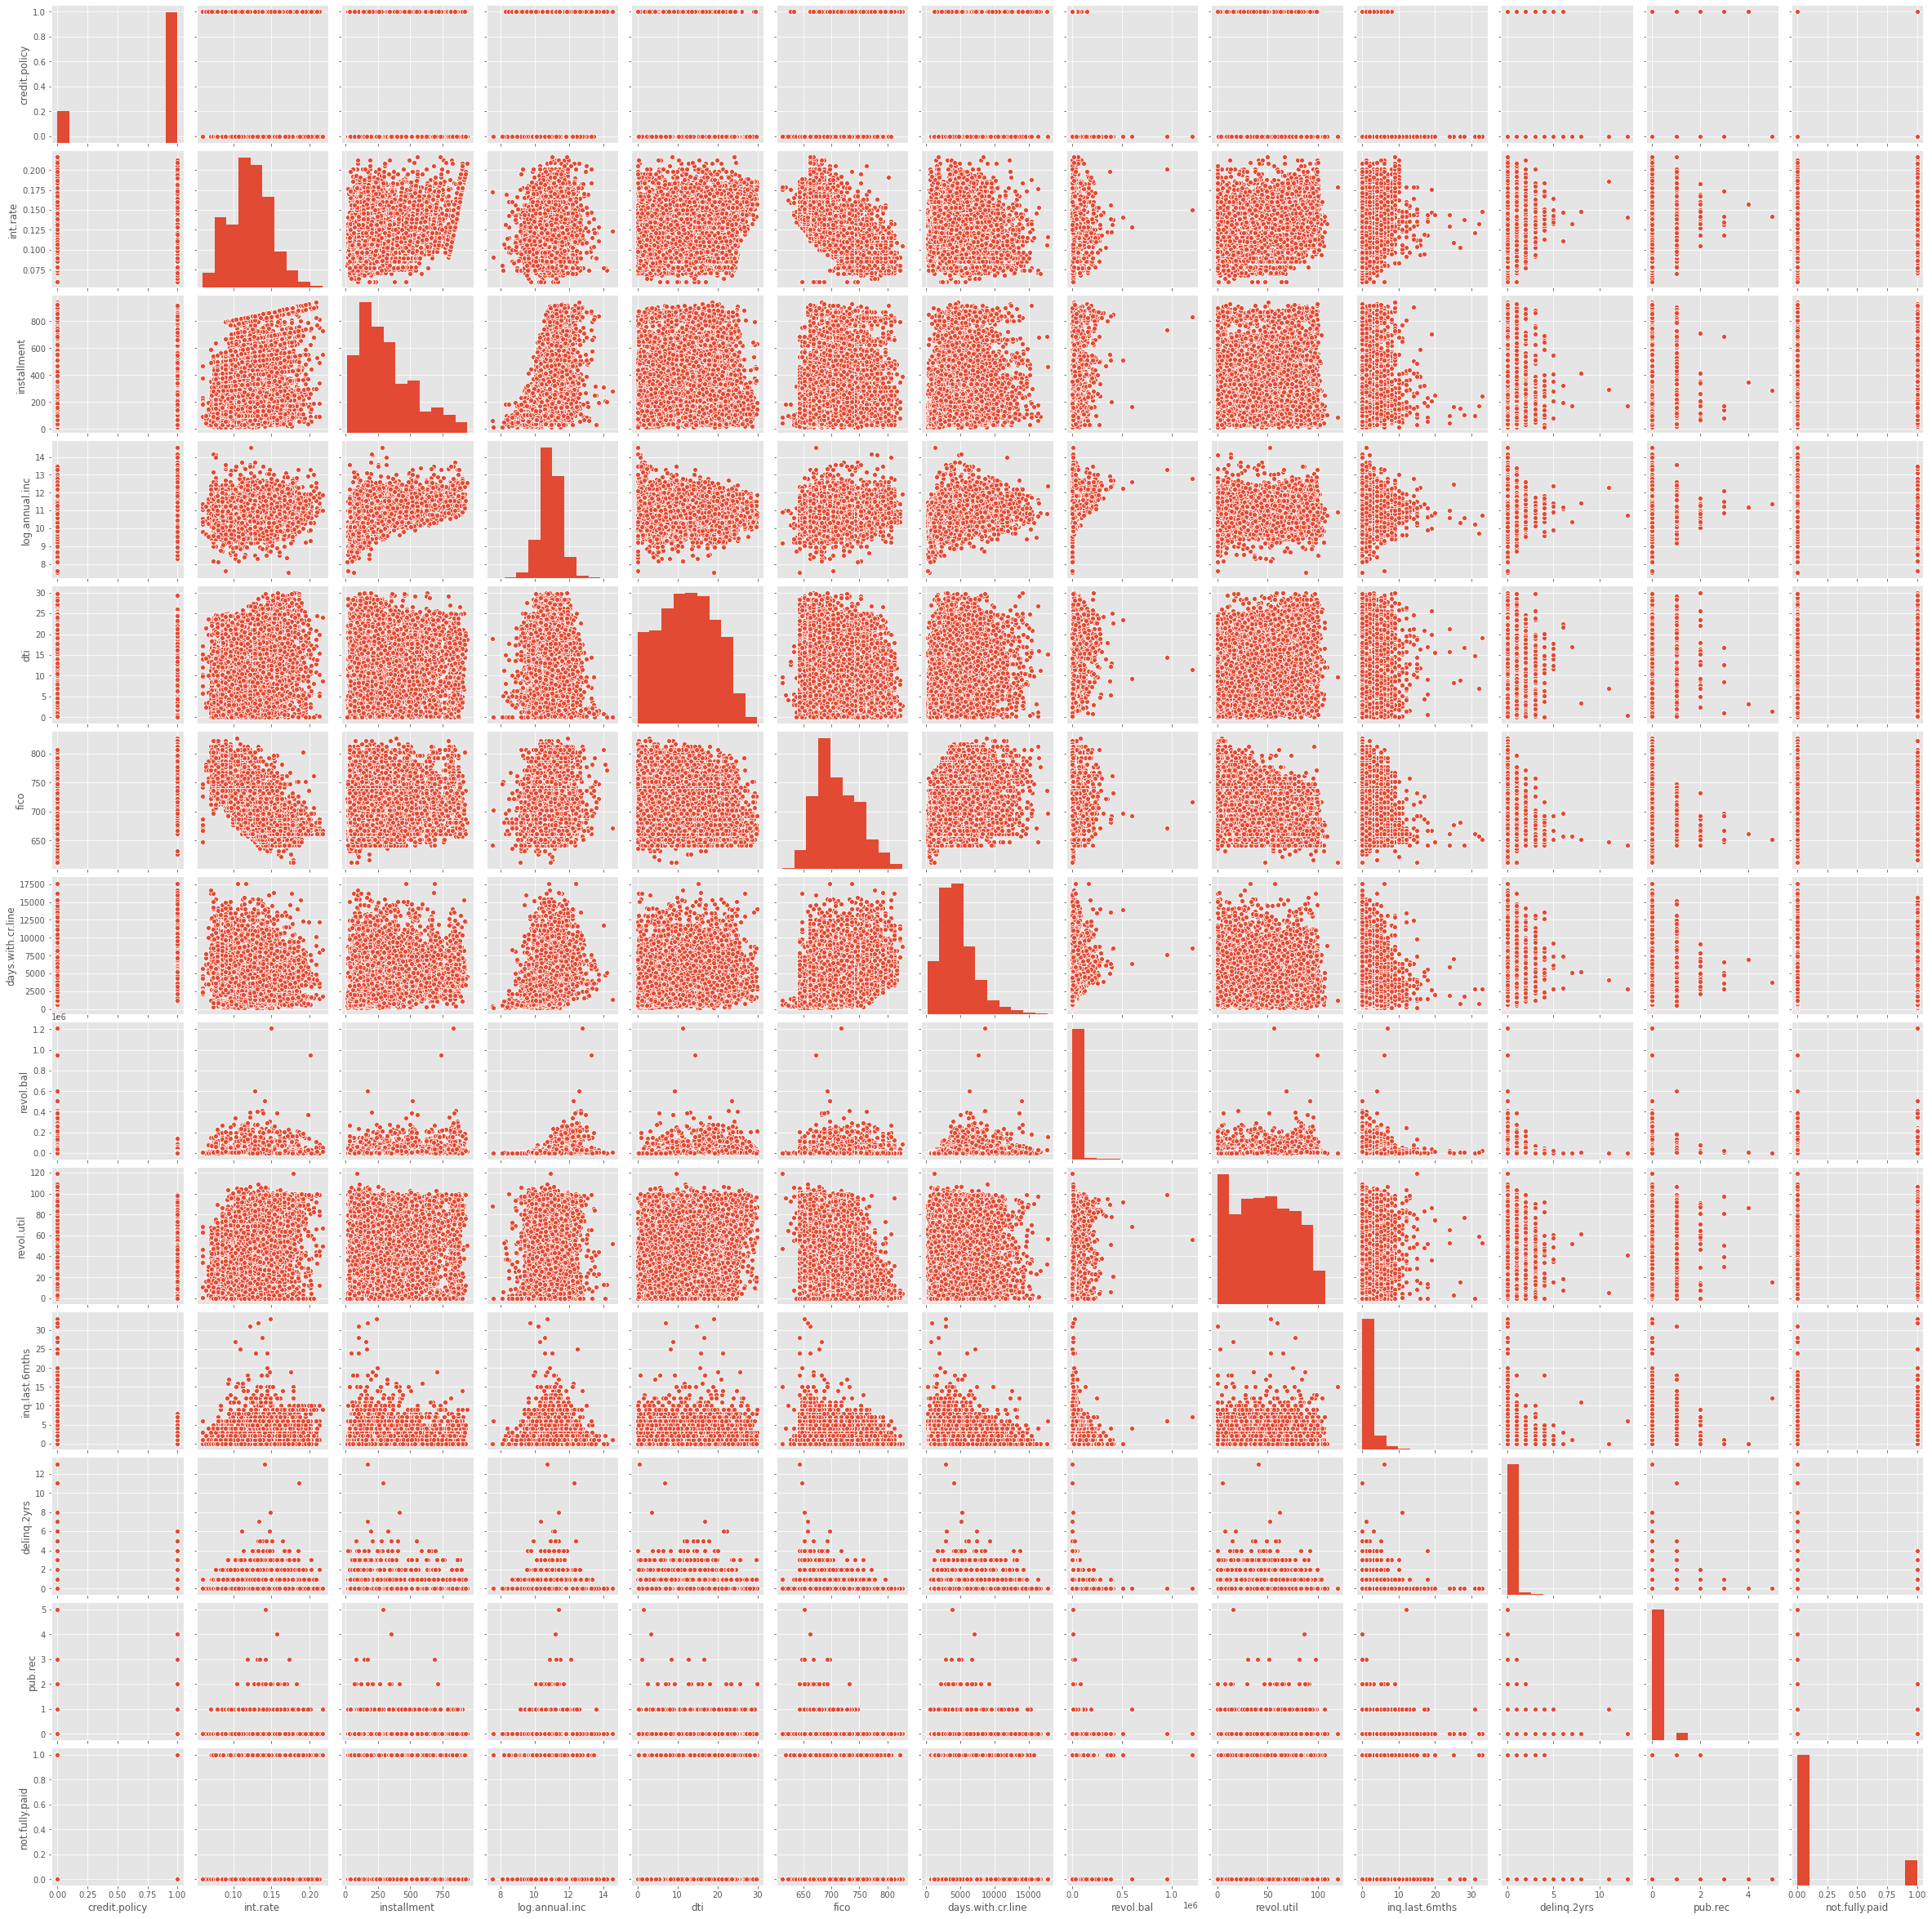

In [82]:
# Relação entre váriaveis
sns.pairplot(df)

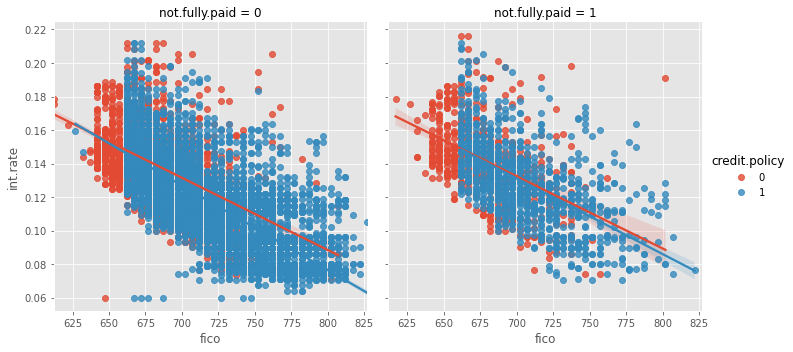

In [83]:
# Plotando a tendencia entre not.fully,paid e credit.policy 

sns.lmplot('fico','int.rate', data=df, hue='credit.policy', col='not.fully.paid')

In [84]:
# Observndo tipos e quantidades de purpose
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [93]:
df_dummy = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [94]:
df_dummy

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [95]:
# Dividindo em X e y
y = df_dummy.pop('not.fully.paid')
X = df_dummy

In [96]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('Acurácia de treino: ',dtc.score(X_train, y_train))
print('Acurácia de teste: ',dtc.score(X_test, y_test))

Acurácia de treino:  1.0
Acurácia de teste:  0.7331245650661099


In [98]:
y_pred_dtc = dtc.predict(X_test)

In [99]:
# Verificando classification report e confusion matrix
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2408
           1       0.19      0.20      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [104]:
# Verificando classification report e confusion matrix
print(confusion_matrix(y_test, y_pred_dtc))

[[2014  394]
 [ 373   93]]


In [114]:
# Podemos salvar as métricas
pre_dtc = precision_score(y_test, y_pred_dtc)
rec_dtc = recall_score(y_test, y_pred_dtc)
acc_dtc = dtc.score(X_test, y_test)
f1s_dtc = f1_score(y_test, y_pred_dtc)

In [101]:
# Fazendo Random Forest

rtc = RandomForestClassifier()
rtc.fit(X_train, y_train)
rtc.score(X_test, y_test)

0.8354210160055672

In [106]:
y_pred_rtc = rtc.predict(X_test)

In [107]:
# Verificando classification report e confusion matrix
print(classification_report(y_test, y_pred_rtc))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.35      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.59      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



In [108]:
# Verificando classification report e confusion matrix
print(confusion_matrix(y_test, y_pred_rtc))

[[2393   15]
 [ 458    8]]


In [109]:
# Há uma melhora considerável nos FP
# Vamos verificar a diferença dos modelos

In [113]:
# Podemos salvar as métricas
pre_rtc = precision_score(y_test, y_pred_rtc)
rec_rtc = recall_score(y_test, y_pred_rtc)
acc_rtc = rtc.score(X_test, y_test)
f1s_rtc = f1_score(y_test, y_pred_rtc)

In [117]:
resultado_final = pd.DataFrame({'DecisionTree':[acc_dtc, pre_dtc, rec_dtc, f1s_dtc],'RandomForest':[acc_rtc, pre_rtc, rec_rtc, f1s_rtc]})
resultado_final.index = ['Acurácia','Precision','Recall','F1 Score']
resultado_final

,DecisionTree,RandomForest
Acurácia,0.733125,0.835421
Precision,0.190965,0.347826
Recall,0.199571,0.017167
F1 Score,0.195173,0.032720


In [119]:
# Random Forst muito mais equilibrado!
# E por último a comparação da curva ROC

Text(0.5, 1.0, 'Árvore de Decisão')

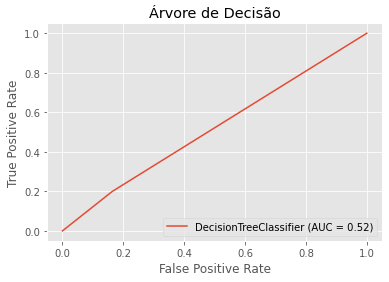

In [121]:
plot_roc_curve(dtc, X_test, y_test)
plt.title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

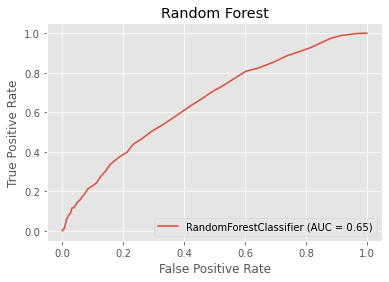

In [122]:
plot_roc_curve(rtc, X_test, y_test)
plt.title('Random Forest')

In [123]:
# Ambos são classificadores ruins, poderiamos coletar mais dados.
# Entretanto Random Forest teve resultado um pouco melhor!!!